In [86]:
# Sites com Quick start para ggplot usando o R
##http://www.sthda.com/english/wiki/ggplot2-box-plot-quick-start-guide-r-software-and-data-visualization#customized-box-plots  -> quick start
##http://www.sthda.com/english/wiki/ggplot2-stripchart-jitter-quick-start-guide-r-software-and-data-visualization  -> Adicionar jitter (dispersão)
##http://sape.inf.usi.ch/quick-reference/ggplot2/geom_jitter -> Adicionar jitter (dispersão)
##https://r-graph-gallery.com/275-add-text-labels-with-ggplot2.html  -> Labels (rótulos)
## https://cmdlinetips.com/2019/05/how-to-highlight-select-data-points-with-ggplot2-in-r/   -> adicionar highlihts

In [2]:
library("readr")
library("tidyverse")
library ("ggplot2")
library('openxlsx')

Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ purrr     1.0.1
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
#Lendo todas as tabelas
RNAP107 <- read_tsv ('../merged-rmats-tables/RNAP-107/RNAP107_boxplot.tsv')
RNAP111 <- read_tsv ('../merged-rmats-tables/RNAP-111/RNAP111_boxplot.tsv')
RNAP112 <- read_tsv ('../merged-rmats-tables/RNAP-112/RNAP112_boxplot.tsv')
RNAP117 <- read_tsv ('../merged-rmats-tables/RNAP-117/RNAP117_boxplot.tsv')

Rows: 168 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Evento, Gene, Amostra
dbl (3): ID, PSI_CTRL, PSI_caso

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 56 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Evento, Gene, Amostra
dbl (3): ID, PSI_CTRL, PSI_caso

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 168 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Evento, Gene, Amostra
dbl (3): ID, PSI_CTRL, PSI_caso

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this me

In [5]:
str(RNAP107)
str(RNAP111)
str(RNAP112)
str(RNAP117)

spc_tbl_ [168 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Evento  : chr [1:168] "SE" "SE" "SE" "SE" ...
 $ ID      : num [1:168] 32708 32708 32708 32708 32708 ...
 $ Gene    : chr [1:168] "MSH2" "MSH2" "MSH2" "MSH2" ...
 $ PSI_CTRL: num [1:168] 0.876 0.887 0.87 0.866 0.893 0.97 0.986 0.95 0.999 0.972 ...
 $ PSI_caso: num [1:168] 0.348 0.348 0.348 0.348 0.348 0.348 0.348 0.348 0.348 0.348 ...
 $ Amostra : chr [1:168] "RNAP_107" "RNAP_107" "RNAP_107" "RNAP_107" ...
 - attr(*, "spec")=
  .. cols(
  ..   Evento = col_character(),
  ..   ID = col_double(),
  ..   Gene = col_character(),
  ..   PSI_CTRL = col_double(),
  ..   PSI_caso = col_double(),
  ..   Amostra = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 
spc_tbl_ [56 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Evento  : chr [1:56] "SE" "SE" "SE" "SE" ...
 $ ID      : num [1:56] 5293 5293 5293 5293 5293 ...
 $ Gene    : chr [1:56] "RAD51C" "RAD51C" "RAD51C" "RAD51C" ...
 $ PSI_CTRL: num [1:56] 0.98 0.97 0.927 0.

In [6]:
# Unindo todas as tabelas (uma embaixo da outra), porque tem a mesma quantidade de colunas
all_tab <- rbind(RNAP107,RNAP111,RNAP112,RNAP117)
str(all_tab)

spc_tbl_ [504 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Evento  : chr [1:504] "SE" "SE" "SE" "SE" ...
 $ ID      : num [1:504] 32708 32708 32708 32708 32708 ...
 $ Gene    : chr [1:504] "MSH2" "MSH2" "MSH2" "MSH2" ...
 $ PSI_CTRL: num [1:504] 0.876 0.887 0.87 0.866 0.893 0.97 0.986 0.95 0.999 0.972 ...
 $ PSI_caso: num [1:504] 0.348 0.348 0.348 0.348 0.348 0.348 0.348 0.348 0.348 0.348 ...
 $ Amostra : chr [1:504] "RNAP_107" "RNAP_107" "RNAP_107" "RNAP_107" ...
 - attr(*, "spec")=
  .. cols(
  ..   Evento = col_character(),
  ..   ID = col_double(),
  ..   Gene = col_character(),
  ..   PSI_CTRL = col_double(),
  ..   PSI_caso = col_double(),
  ..   Amostra = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


In [6]:
write_tsv(all_tab, "all_tab_boxplot.tsv")

In [5]:
#Selecionar apenas 1 ID por amostra, porque está pegando todos os IDs do paciente

In [7]:
# Selecionando apenas o ID mais relevante por amostra
ID_relev <- all_tab %>% filter (ID %in% c(60071,5293,59897,44466))
str (ID_relev)
#write_tsv(ID_relev, "IDs_Relevantes_boxplot.tsv")

spc_tbl_ [224 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Evento  : chr [1:224] "SE" "SE" "SE" "SE" ...
 $ ID      : num [1:224] 60071 60071 60071 60071 60071 ...
 $ Gene    : chr [1:224] "MSH2" "MSH2" "MSH2" "MSH2" ...
 $ PSI_CTRL: num [1:224] 0.739 0.756 0.732 0.723 0.842 0.95 0.961 0.843 0.998 0.941 ...
 $ PSI_caso: num [1:224] 0.278 0.278 0.278 0.278 0.278 0.278 0.278 0.278 0.278 0.278 ...
 $ Amostra : chr [1:224] "RNAP_107" "RNAP_107" "RNAP_107" "RNAP_107" ...
 - attr(*, "spec")=
  .. cols(
  ..   Evento = col_character(),
  ..   ID = col_double(),
  ..   Gene = col_character(),
  ..   PSI_CTRL = col_double(),
  ..   PSI_caso = col_double(),
  ..   Amostra = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


In [8]:
#Criando o dataframe apenas dos PSIs dos casos → Highlight e label
PSI_caso <- c(0.278,0.384,0.715,0.508)
Amostra <- c('RNAP_107','RNAP_111','RNAP_112','RNAP_117')
variante <- c('MSH2:c.942+3A>T','RAD51C:c.905-2_905-1delAG','MLH1:c.677G>A','BRCA1:c.547+2T>A')
data_casos <- data.frame (PSI_caso,Amostra,variante)
data_casos %>% head

,PSI_caso,Amostra,variante
,<dbl>,<chr>,<chr>
1,0.278,RNAP_107,MSH2:c.942+3A>T
2,0.384,RNAP_111,RAD51C:c.905-2_905-1delAG
3,0.715,RNAP_112,MLH1:c.677G>A
4,0.508,RNAP_117,BRCA1:c.547+2T>A


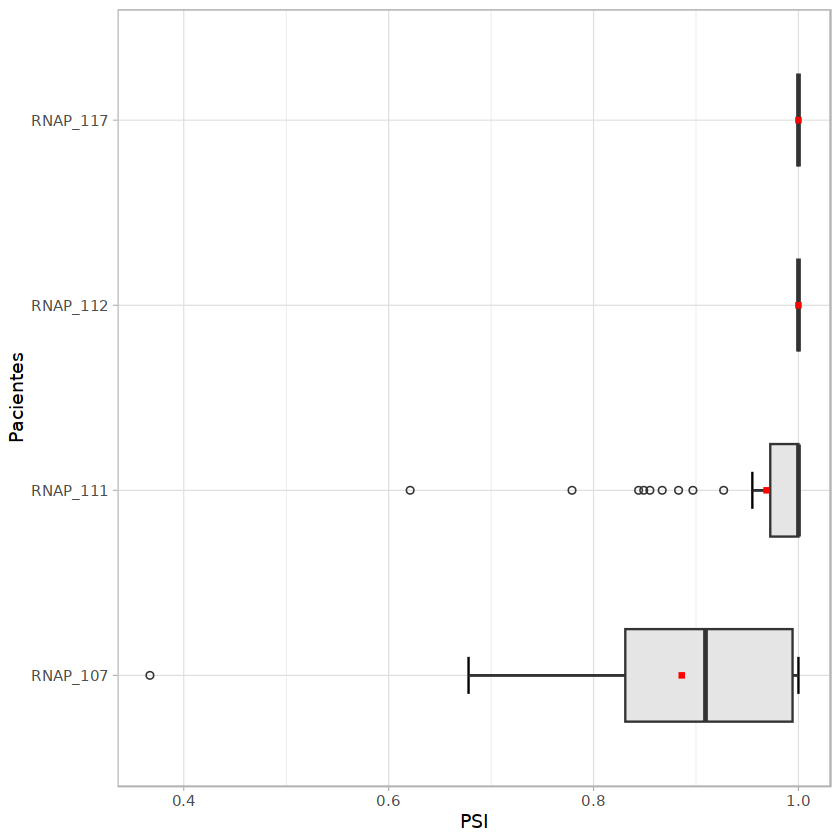

In [44]:
# Com o ID mais relevante por amostra com a média
ggplot (data = ID_relev, aes(x = PSI_CTRL, y = Amostra)) + 
    geom_errorbar (stat = "boxplot" , width = 0.2) +  #barra de erro
    geom_boxplot (width = 0.5 , fill = "grey90", outlier.shape = 1) + #bloxplot
    geom_point(stat = "summary", fun = "mean" , shape = 15 , color ='red') + #média
    labs(y = 'Pacientes' , x = 'PSI') + #label eixos
    theme_light ()

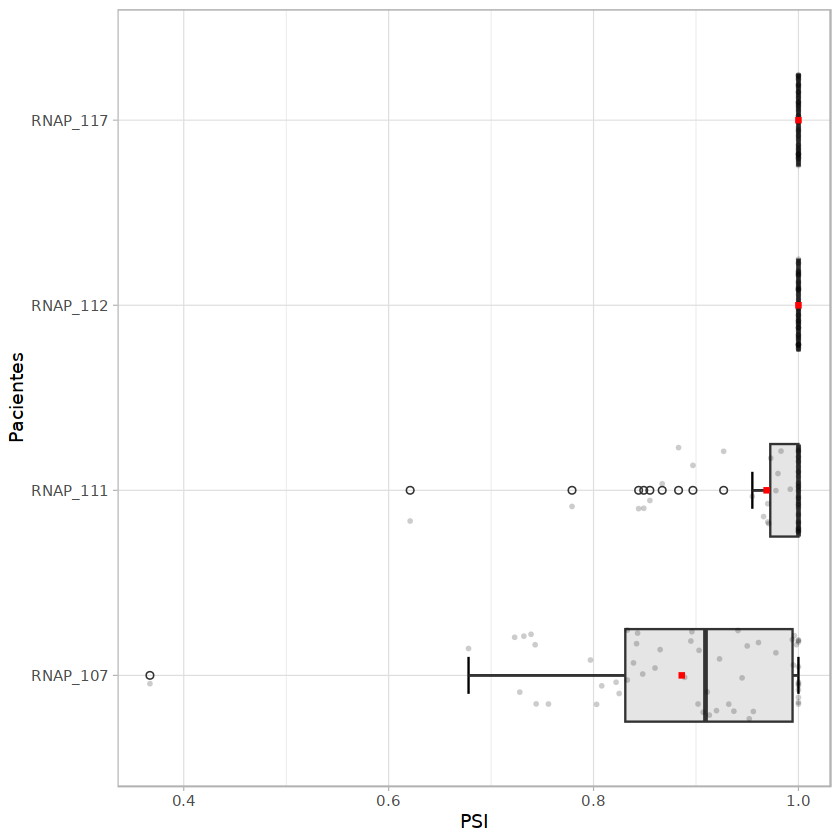

In [87]:
# Com o ID mais relevante por amostra -> jitter
ggplot (data = ID_relev, aes(x = PSI_CTRL, y = Amostra)) + 
    geom_errorbar (stat = "boxplot" , width = 0.2) +  #barra de erro
    geom_boxplot (width = 0.5 , fill = "grey90", outlier.shape = 1) + #bloxplot
    geom_jitter(shape=16, size=1, alpha= 0.2, height=0.25, width=0) + #jitter - alpha = transparência , height e width= para não ficar tão aleatório os pontos; height= para ficar disperso na largura do bloxpot colocar a metade da medida do width usada no Geom_boxplot 
    geom_point(stat = "summary", fun = "mean" , shape = 15 , color ='red') + #média
    labs(y = 'Pacientes' , x = 'PSI') + #label eixos
    theme_light ()

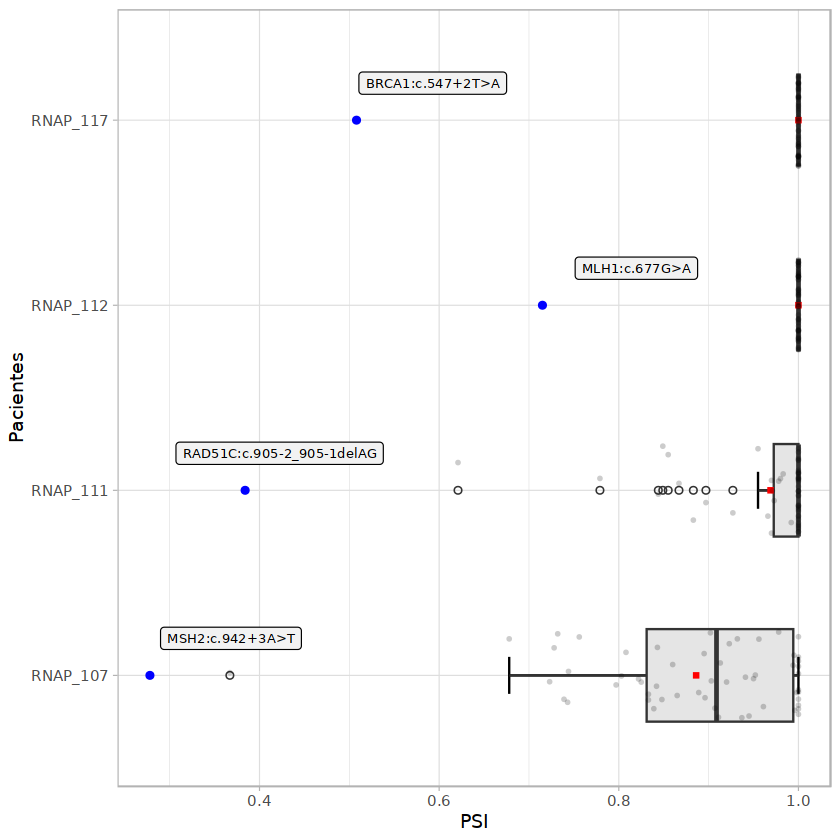

In [9]:
# ID mais relevante -> Criar label para os pontos exclusivos
# Salvando com baixa qualidade
#png("boxplot.png")
ggplot (data = ID_relev, aes(x = PSI_CTRL, y = Amostra)) + 
    geom_errorbar (stat = "boxplot" , width = 0.2) +  
    geom_boxplot (width = 0.5 , fill = "grey90", outlier.shape = 1) +
    geom_point(data=data_casos,                 #Utiliza o dataframe criado para criar pontos exclusivos
             aes(x=PSI_caso,y=Amostra), 
             color='blue',
             size=1.5) +
    geom_label (data = data_casos, aes(x = PSI_caso, 
                                       y= Amostra,
                                      label = variante), 
                size = 2.7, fill='grey95',
                hjust=1.2, 
                position= position_nudge(x=0.2, y=0.2), #Movimentar o texto ou para direita/esquerda (x), para cima/baixo (y)
                label.padding = unit(4,'pt')) +
    geom_point(stat = "summary", fun = "mean" , shape = 15 , color ='red') + 
    geom_jitter(shape=16, size=1, alpha= 0.2, height=0.25, width=0) + 
    labs(y = 'Pacientes' , x = 'PSI') + #label eixos
    theme_light ()
#dev.off()

In [11]:
# ID mais relevante -> Maior a label e sem Jitter
# Salvando com alta qualidade
jpeg("test.jpeg", units="in", width=10, height=10, res=300)
ggplot (data = ID_relev, aes(x = PSI_CTRL, y = Amostra)) + 
    geom_errorbar (stat = "boxplot" , width = 0.2) +  
    geom_boxplot (width = 0.5 , fill = "grey90", outlier.shape = 1) +
    geom_point(data=data_casos,                 #Utiliza o dataframe criado previamente para criar pontos exclusivos
             aes(x=PSI_caso,y=Amostra), 
             color='red',
             size=2) +
    geom_label (data = data_casos, aes(x = PSI_caso, 
                                       y= Amostra,
                                      label = variante), 
                size = 4, fill='grey95',
                hjust=1.2, 
                position= position_nudge(x=0.2, y=0.2), #Movimentar o texto ou para direita/esquerda (x), para cima/baixo (y)
                label.padding = unit(4,'pt')) +
    geom_point(stat = "summary", fun = "mean" , shape = 15 , color ='blue') + 
    #geom_jitter(shape=16, size=1, alpha= 0.2, height=0.25, width=0) + 
    labs(y = 'Pacientes' , x = 'PSI') + #label eixos
    theme_light ()
dev.off()

png 
  2

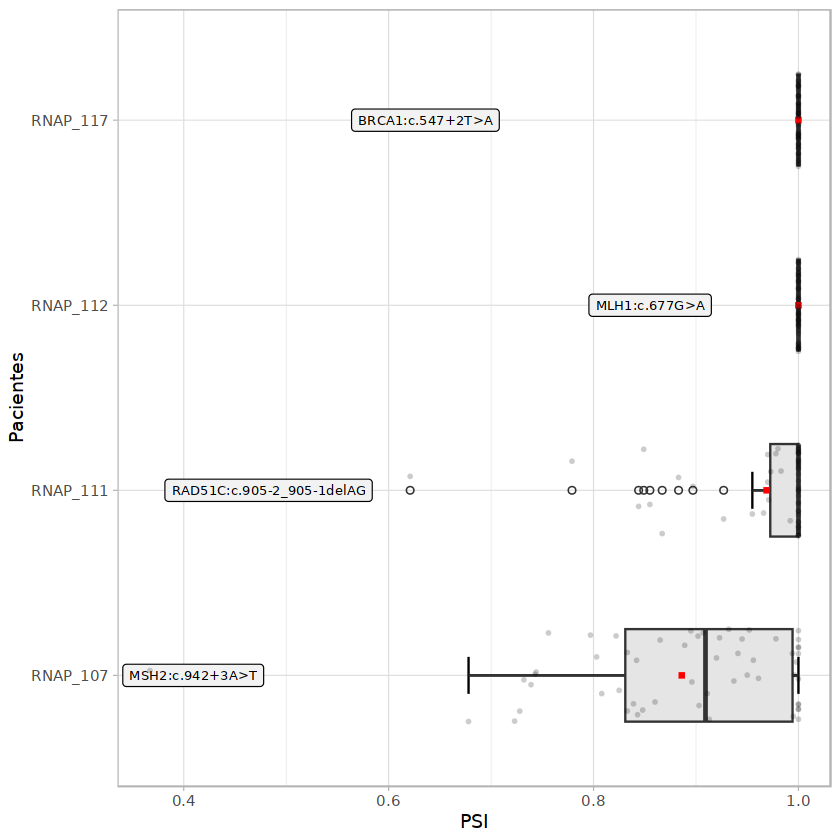

In [14]:
# ID mais relevante -> apenas LABEL 
ggplot (data = ID_relev, aes(x = PSI_CTRL, y = Amostra)) + 
    geom_errorbar (stat = "boxplot" , width = 0.2) +  
    geom_boxplot (width = 0.5 , fill = "grey90", outlier.shape = 1) +
    geom_label (data = data_casos, aes(x = PSI_caso, 
                                       y= Amostra,
                                      label = variante), 
                size = 2.7, fill='grey95',
                hjust=1, 
                position= position_nudge(x=0.2), #Movimentar o texto ou para direita/esquerda (x), para cima/baixo (y)
                label.padding = unit(4,'pt')) + #ajusta a borda
    #scale_x_discrete (expand = expansion(add= c(0.05,0.02))) +  #Expandir o eixo que está os valores para não cortar a label(primeiro valor é direita, segundo esquerda)
    geom_point(stat = "summary", fun = "mean" , shape = 15 , color ='red') + 
    geom_jitter(shape=16, size=1, alpha= 0.2, height=0.25, width=0) + 
    labs(y = 'Pacientes' , x = 'PSI') + #label eixos
    theme_light ()

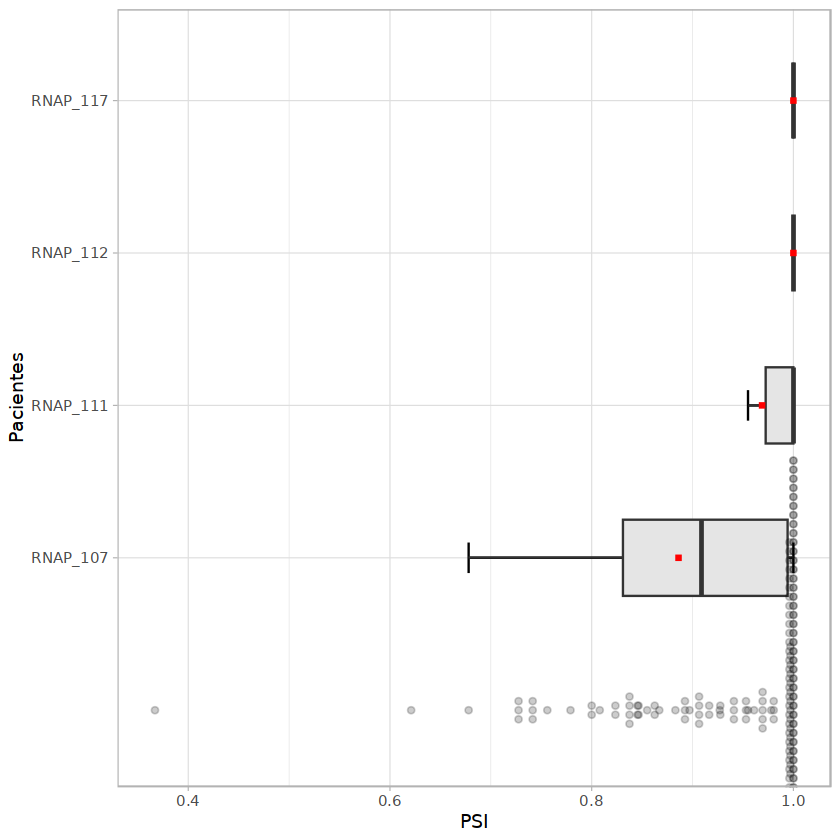

In [84]:
# Com dotplot
ggplot (data = ID_relev, aes(x = PSI_CTRL, y = Amostra)) + 
    geom_errorbar (stat = "boxplot" , width = 0.2) +  #barra de erro
    geom_boxplot (width = 0.5 , fill = "grey90", outlier.color = NA) + 
    geom_dotplot (binaxis = "x", binwidth = 0.01, stackdir = "center", stackratio = 1.5, alpha=0.2, dotsize =0.6) +
    geom_point(stat = "summary", fun = "mean" , shape = 15 , color ='red') + #média
    labs(y = 'Pacientes' , x = 'PSI') + #label eixos
    theme_light ()

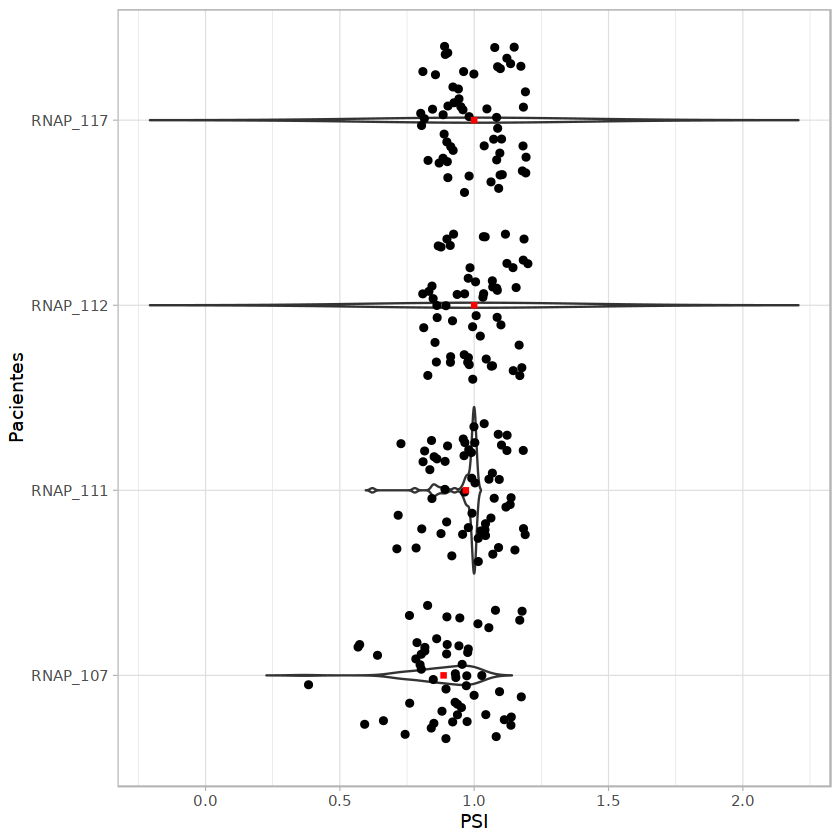

In [56]:
# Com o ID mais relevante por amostra -> viloin
ggplot (data = ID_relev, aes(x = PSI_CTRL, y = Amostra)) + 
    geom_violin(trim = FALSE) +
    geom_jitter(position=position_jitter(0.2)) +
    geom_point(stat = "summary", fun = "mean" , shape = 15 , color ='red') + #média
    labs(y = 'Pacientes' , x = 'PSI') + #label eixos
    theme_light ()

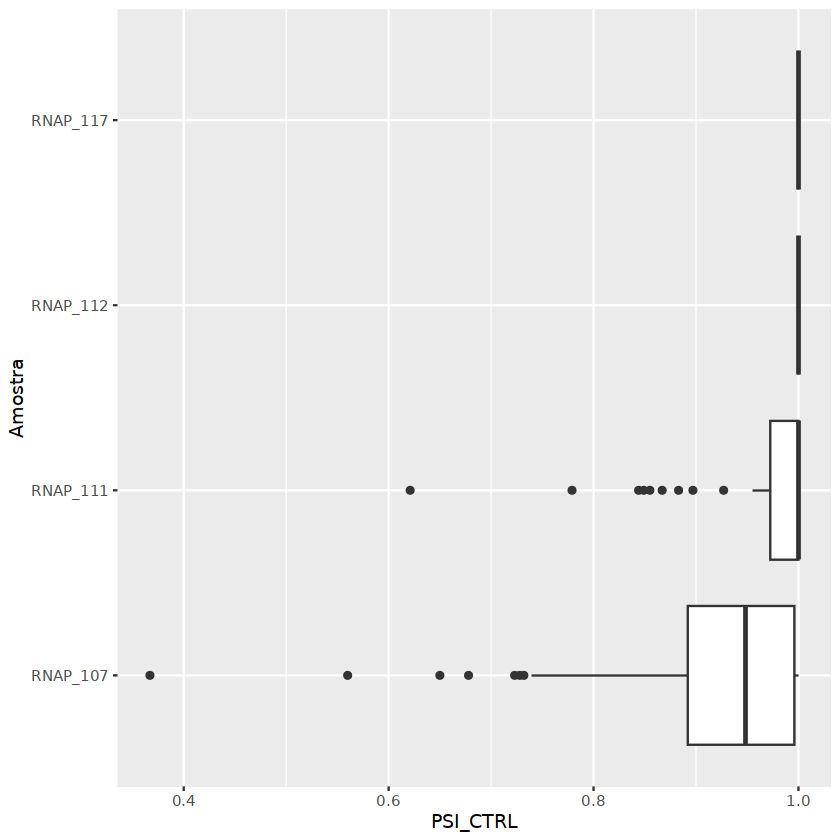

In [31]:
# Sem nenhuma configuração - Por amostra
ggplot (data = all_tab, aes(x = PSI_CTRL, y = Amostra)) + 
    geom_boxplot () #width é a largura do bloco, outlier.shape é o outlier com cor vazada

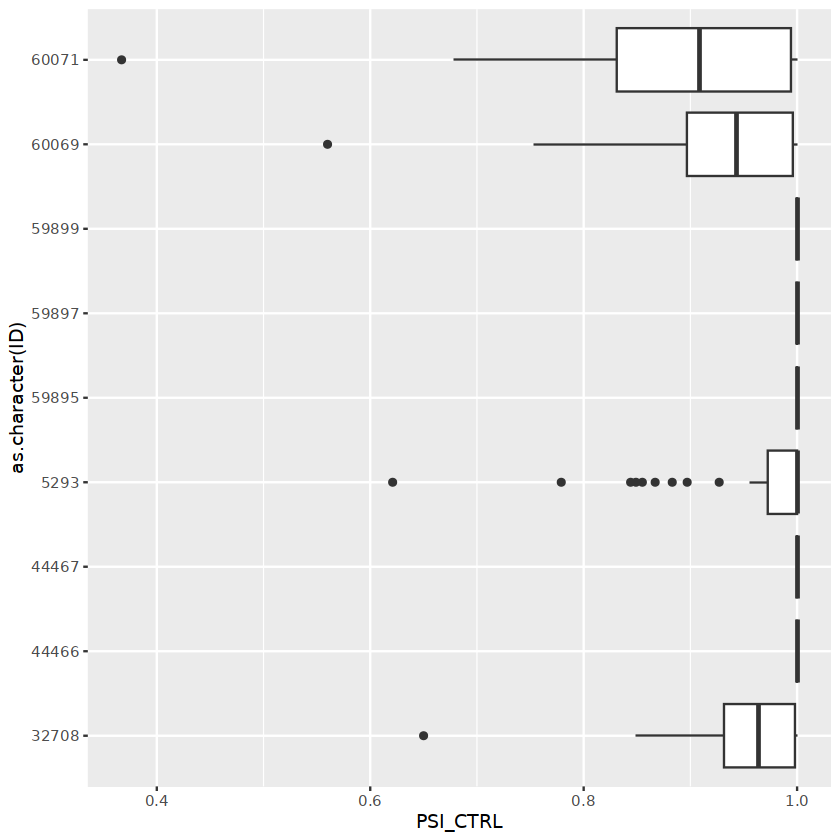

In [33]:
# Sem nenhuma configuração -> por ID
ggplot (data = all_tab, aes(x = PSI_CTRL, y = as.character(ID))) +
    geom_boxplot () #width é a largura do bloco, outlier.shape é o outlier com cor vazada

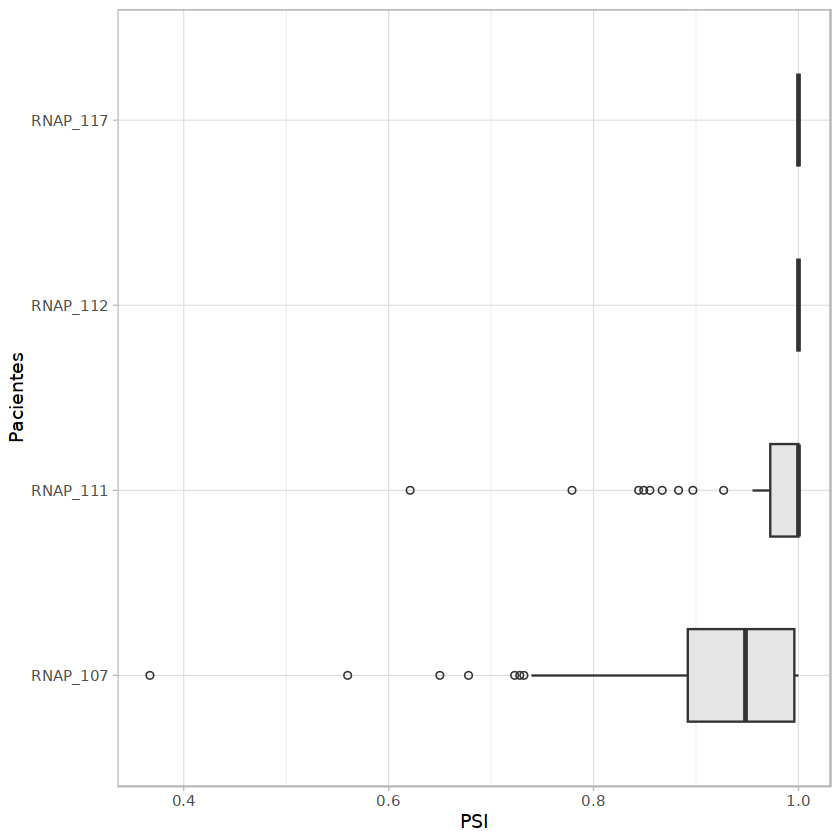

In [10]:
# Ajustando largura do bloco e preenchimento
ggplot (data = all_tab, aes(x = PSI_CTRL, y = Amostra)) + 
    geom_boxplot (width = 0.5 , fill = "grey90", outlier.shape = 1) +  #width é a largura do bloco; fill preenchimento; outlier.shape é o outlier com cor vazada
    labs(y = 'Pacientes' , x = 'PSI') +
    theme_light ()

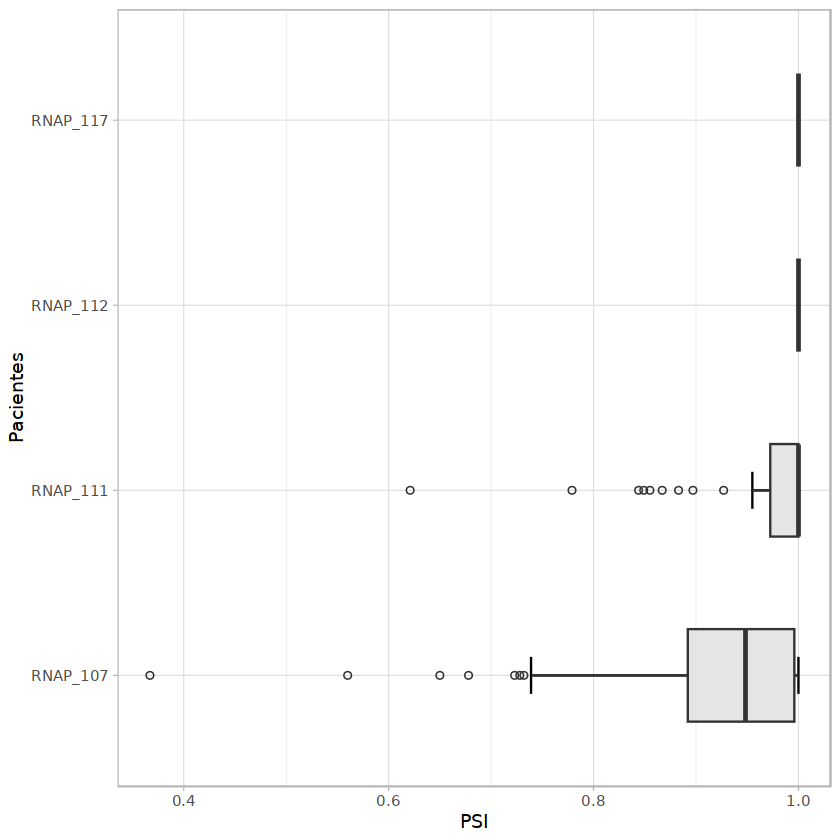

In [11]:
# Adicionando barra de erro
ggplot (data = all_tab, aes(x = PSI_CTRL, y = Amostra)) + 
    geom_errorbar (stat = "boxplot" , width = 0.2) +  #width largura horizontal da da barra de erro
    geom_boxplot (width = 0.5 , fill = "grey90", outlier.shape = 1) +  #width é a largura do bloco; fill preenchimento; outlier.shape é o outlier com cor vazada
    labs(y = 'Pacientes' , x = 'PSI') +
    theme_light ()

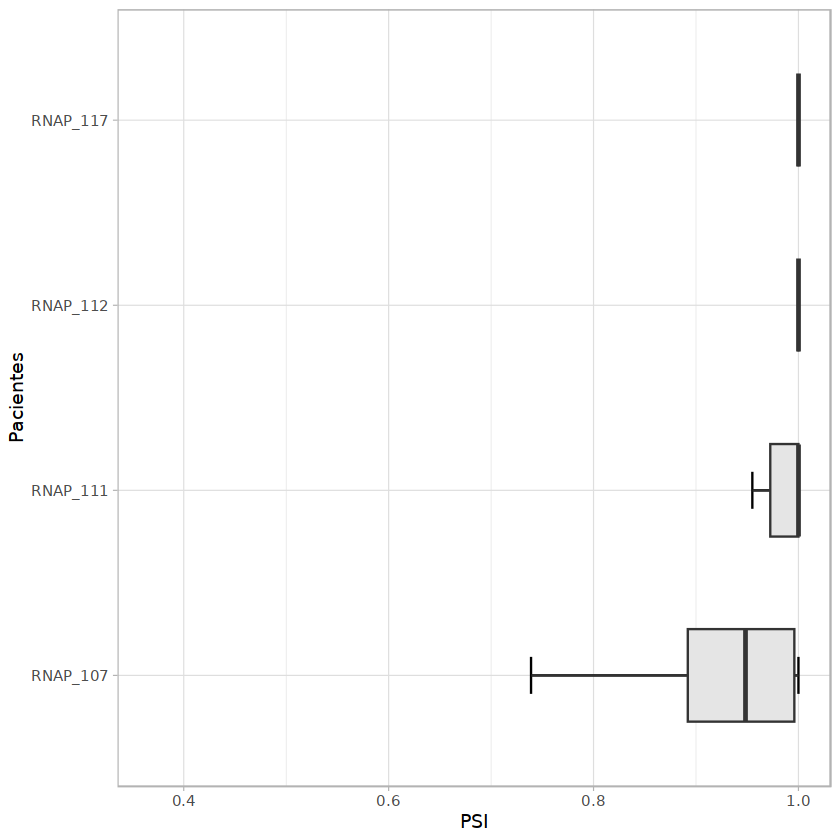

In [12]:
#Remover outlier
ggplot (data = all_tab, aes(x = PSI_CTRL, y = Amostra)) + 
    geom_errorbar (stat = "boxplot" , width = 0.2) +  #width largura horizontal da da barra de erro
    geom_boxplot (width = 0.5 , fill = "grey90", outlier.color = NA) +  #width é a largura do bloco; fill preenchimento; outlier.shape NA para tirar os outliers
    labs(y = 'Pacientes' , x = 'PSI') +
    theme_light ()

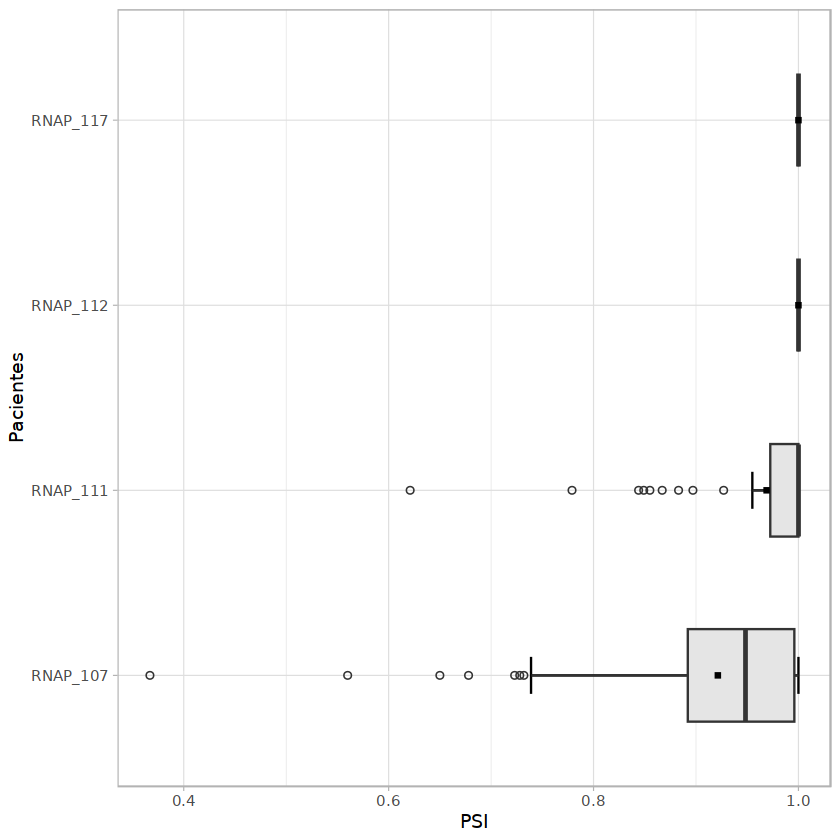

In [13]:
#Adicionar a média
ggplot (data = all_tab, aes(x = PSI_CTRL, y = Amostra)) + 
    geom_errorbar (stat = "boxplot" , width = 0.2) +  #width largura horizontal da da barra de erro
    geom_boxplot (width = 0.5 , fill = "grey90" , outlier.shape = 1) +  #width é a largura do bloco; fill preenchimento; outlier.shape é o outlier com cor vazada
    geom_point(stat = "summary", fun = "mean" , shape = 15) +  #Colocar a média
    labs(y = 'Pacientes' , x = 'PSI') +
    theme_light ()